# Let's make some plots with the stars that have RVs

In [19]:
from astropy.io import fits
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from pyia import GaiaData

In [1]:
# Accessing the FITS table for all DR2 stars that have RVs
from astropy.io import fits
fitsFile = 'data/GaiaDR2_vrad_vel.fits'
ginormoTable = fits.open(fitsFile)

If we don't have a table of all our data just lying around, we can nominally access all of DR2 via astroquery, but it doesn't work for more than a few thousand stars at a time. (The handy pyia has the same problem.)

In [2]:
# Accessing all of DR2 via astroquery
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    if 'dr2' in table.get_qualified_name():
        print (table.get_qualified_name())

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
Retrieving tables...
Parsing tables...
Done.
gaiadr2.gaiadr2.aux_allwise_agn_gdr2_cross_id
gaiadr2.gaiadr2.aux_iers_gdr2_cross_id
gaiadr2.gaiadr2.aux_sso_orbit_residuals
gaiadr2.gaiadr2.aux_sso_orbits
gaiadr2.gaiadr2.dr1_neighbourhood
gaiadr2.gaiadr2.allwise_best_neighbour
gaiadr2.gaiadr2.allwise_neighbourhood
gaiadr2.gaiadr2.apassdr9_best_neighbour
gaiadr2.gaiadr2.apassdr9_neighbourhood
gaiadr2.gaiadr2.gsc23_best_neighbour
gaiadr2.gaiadr2.gsc23_neighbourhood
gaiadr2.gaiadr2.hipparcos2_best_neighbour
gaiadr2.gaiadr2.hipparcos2_neighbourhood
gaiadr2.gaiadr2.panstarrs1_best_neighbour
gaiadr2.gaiadr2.panstarrs1_neighbourhood
gaiadr2.gaiadr2.ppmxl_best_neighbour
gaiadr2.gaiadr2.ppmxl_neighbourhood
gaiadr2.gaiadr2.ravedr5_best_neighbour
gaiadr2.gaiadr2.ravedr5_neighbourhood
gaiadr2.gaiadr2.sdssdr9_best_neighbour
gaiadr2.gaiadr2.sdssdr9_neighbourhood
gaiadr2.gaiadr2.tmass_best_neighbour
gai

In [24]:
# Accessing all of DR2 via pyia
import astropy.units as u
from pyia import GaiaData
#g = GaiaData('/path/to/gaia/data/here')

## Back to exploring our previously scheduled FITS table...

The FITS table was provided by Marchetti et al. 2018 (described in their Appendix B) via flash drive at the Seattle Gaia Sprint. It has:
* Gaia DR2 identifier
* Right ascension
* Declination
* Parallax
* Standard uncertainty in parallax
* Proper motion in right ascension
* Standard uncertainty in proper motion in right ascension
* Proper motion in declination
* Standard uncertainty in proper motion declination
* Radial velocity
* Radial velocity error

And it also has a bunch of their own calculated values used for finding high velocity stars.

### Figure of measured RVs vs. RV errors

In [28]:
# len(ginormoTable[1].data['vrad'])  # size is > 7 million
vrads = ginormoTable[1].data['vrad']
verrs = ginormoTable[1].data['e_vrad']

<IPython.core.display.Javascript object>


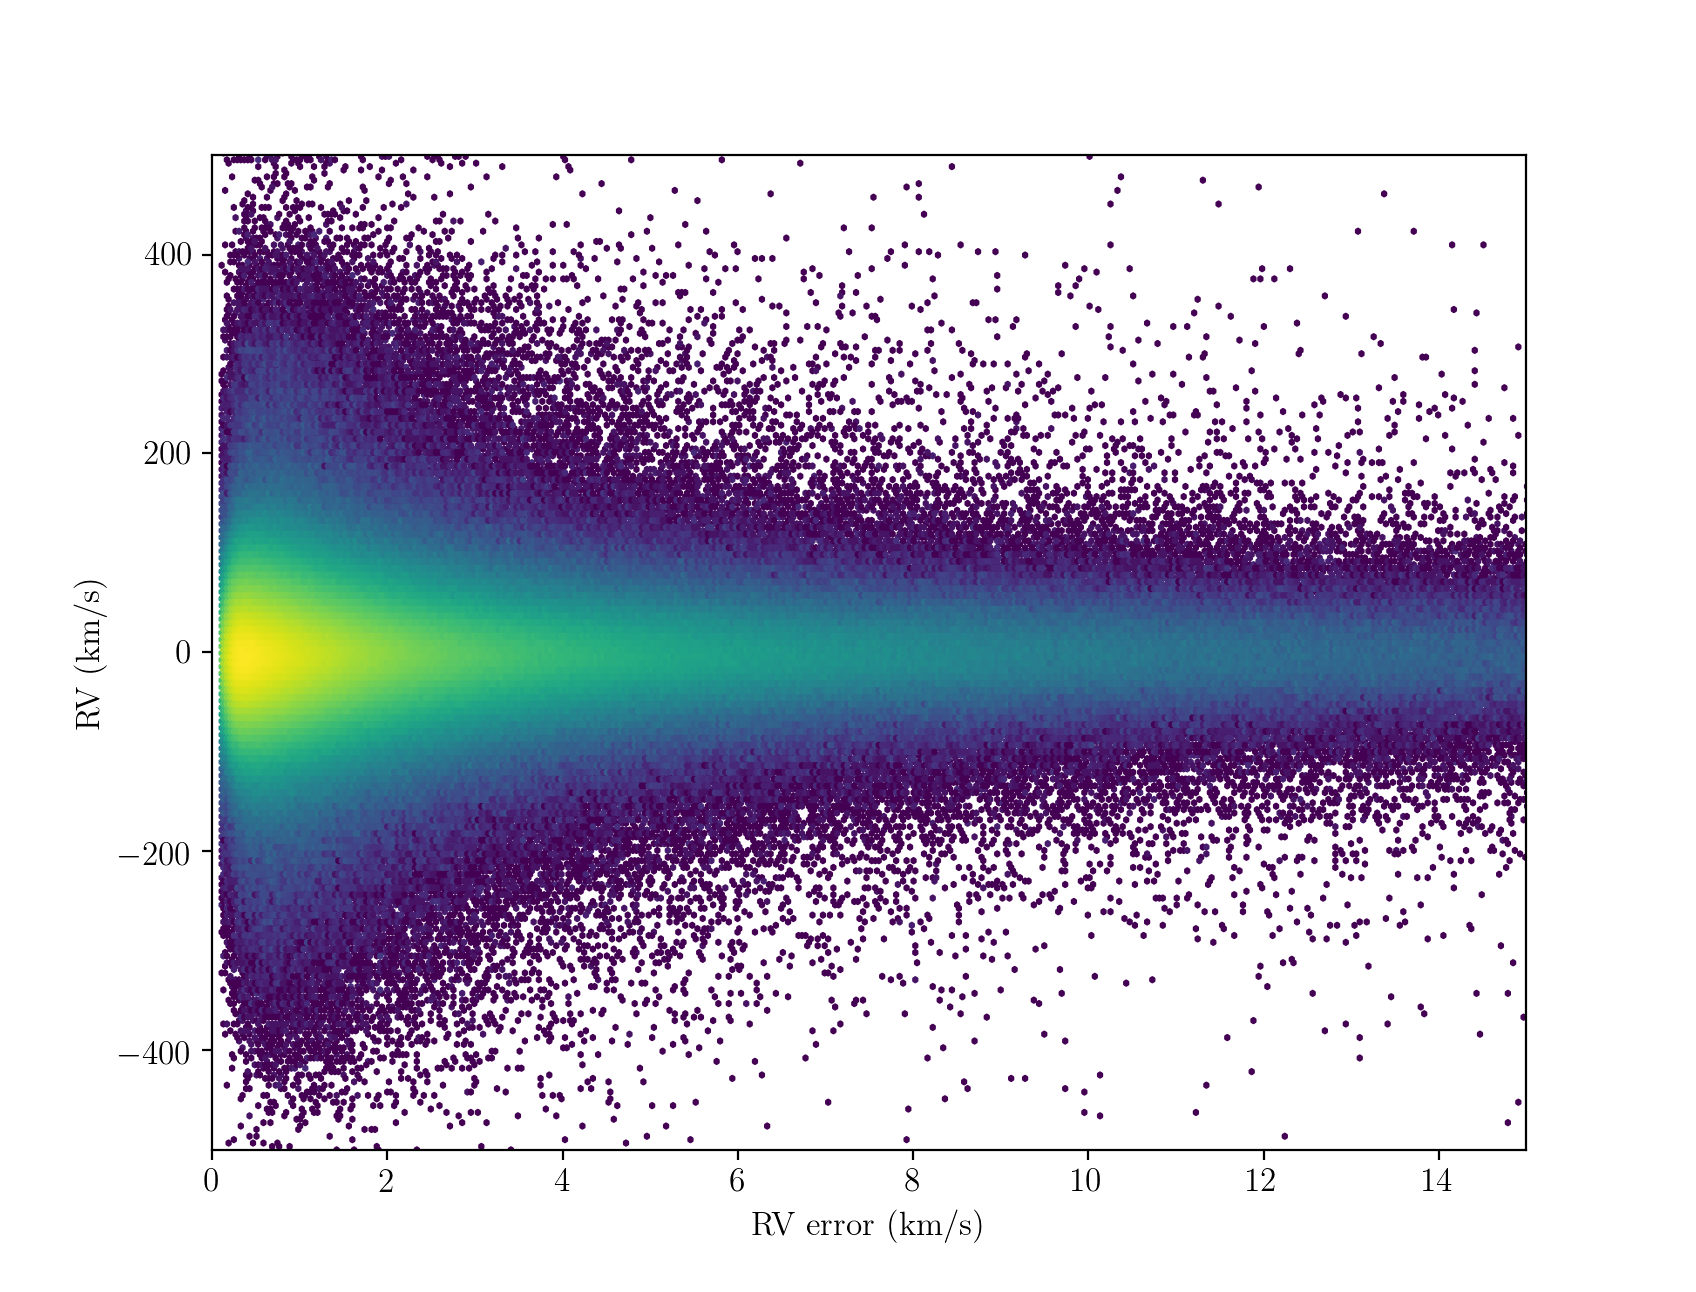

(-500, 500)

In [30]:
plt.figure()
plt.hexbin(verrs, vrads, gridsize=500, mincnt=1, bins='log')
plt.ylabel('RV (km/s)')
plt.xlabel('RV error (km/s)')
plt.xlim([0, 15])
plt.ylim([-500, 500])

### Figures of measured proper motions vs. proper motion errors

In [15]:
# Proper motion data
pmra = ginormoTable[1].data['pmra']
e_pmra = ginormoTable[1].data['e_pmra']
pmdec = ginormoTable[1].data['pmdec']
e_pmdec = ginormoTable[1].data['e_pmdec']

<IPython.core.display.Javascript object>


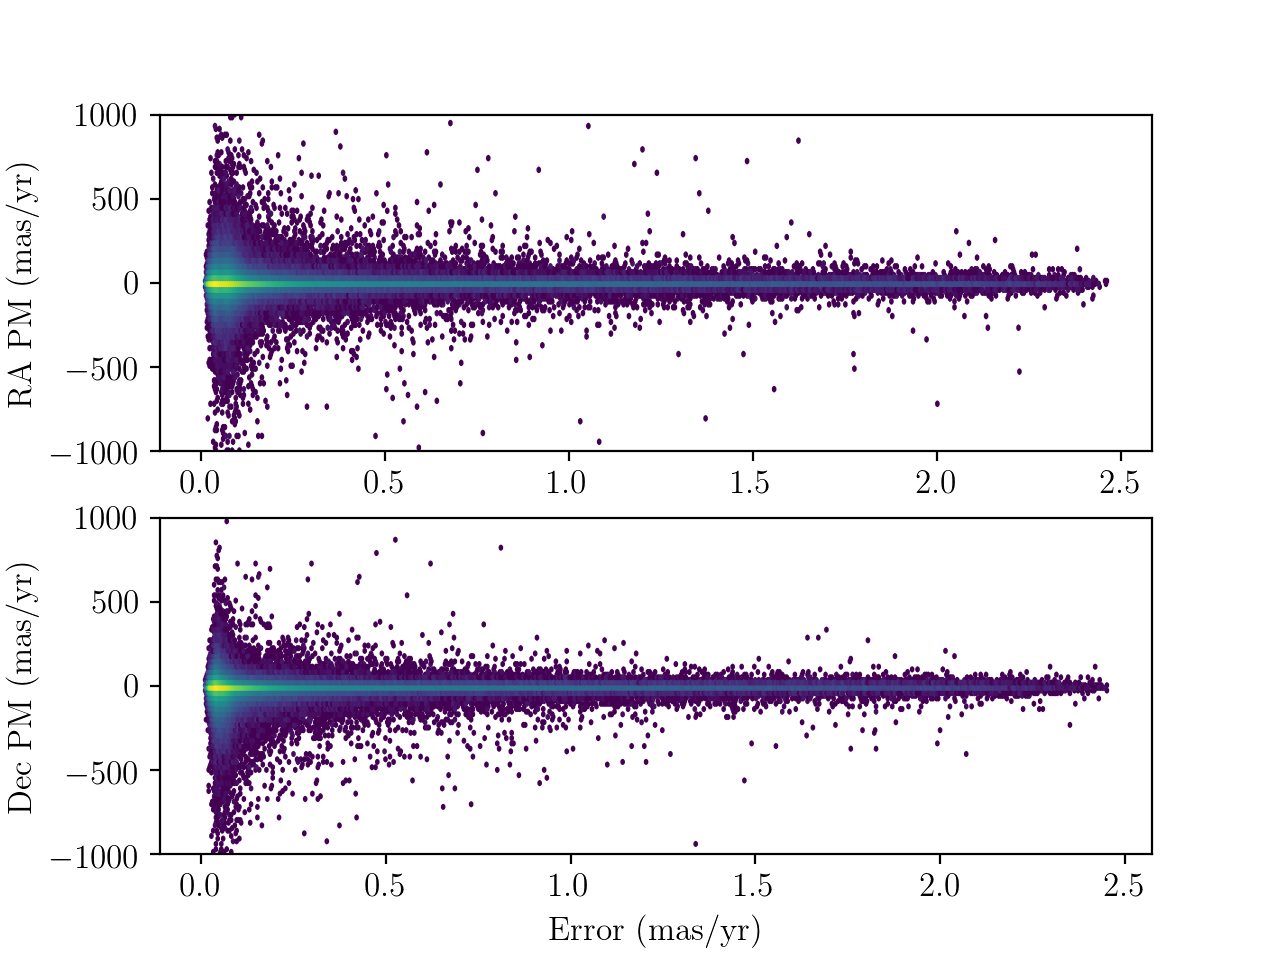

(-1000, 1000)

In [32]:
plt.figure()
plt.subplot(211)
plt.hexbin(e_pmra, pmra, gridsize=500, mincnt=1, bins='log')
plt.ylabel('RA PM (mas/yr)')
plt.ylim([-1000, 1000])

plt.subplot(212)
plt.hexbin(e_pmdec, pmdec, gridsize=500, mincnt=1, bins='log')
plt.ylabel('Dec PM (mas/yr)')
plt.xlabel('Error (mas/yr)')
plt.ylim([-1000, 1000])

## Next step: get MOAR DATA!

This is a bit tricky and took most of a day to sort out because 7 million stars is "not that many" for Gaia but you still have to download it. For all the talk of "let's bring our code to the data" I see no feasible way to do that here... if I have missed it, I would love to be enlightened.

In [33]:
ginormoTable.close()  # not so ginormo anymore!

In [35]:
newFitsFile = 'data/mrawls2-result.fits.gz.fits'
newTable = fits.open(newFitsFile)

In [46]:
#newTable[1].header
nVisits = newTable[1].data['rv_nb_transits']

<IPython.core.display.Javascript object>


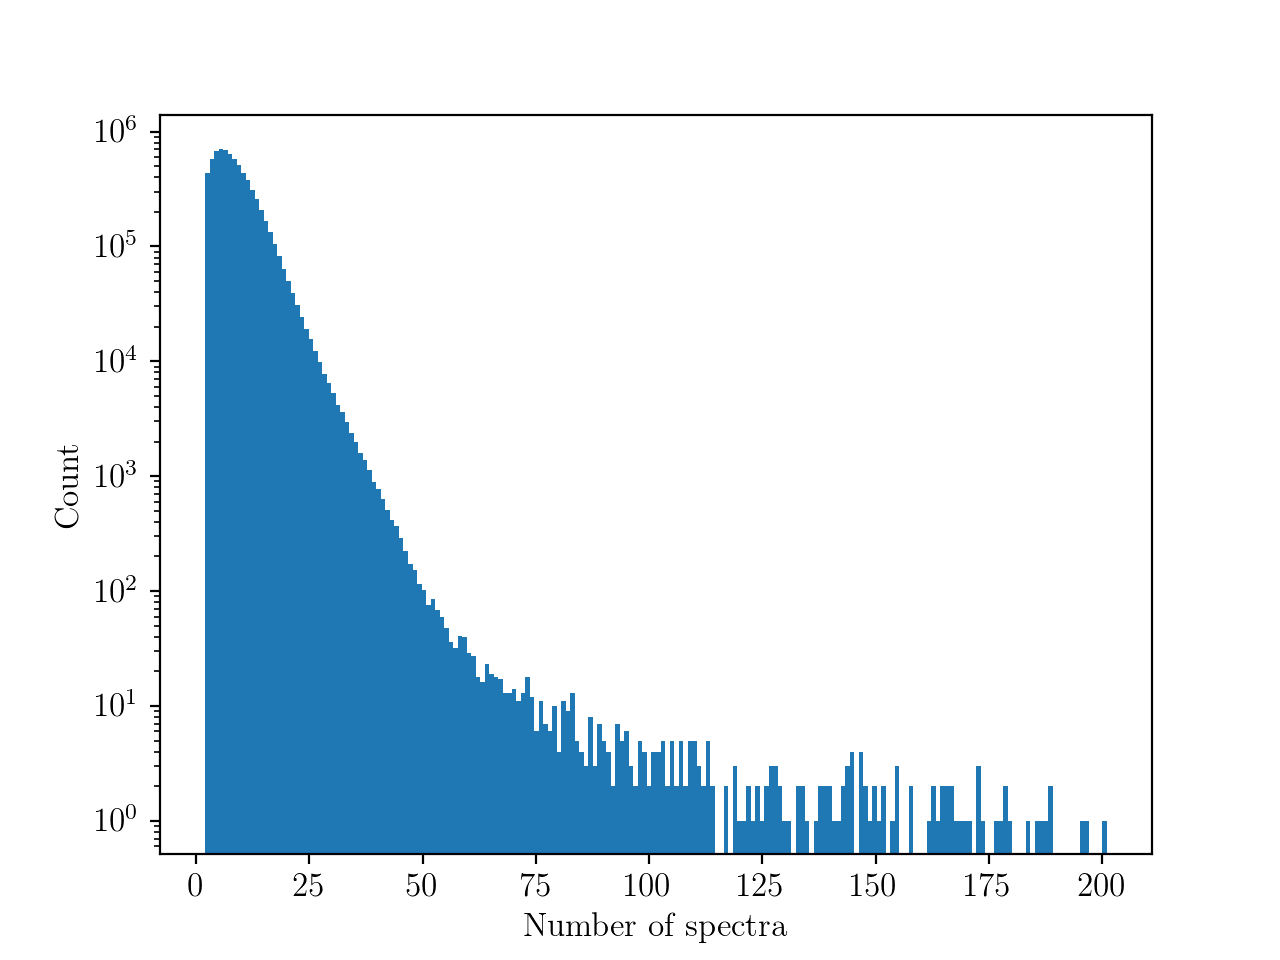

In [45]:
plt.figure()
plt.hist(nVisits, bins=200)
plt.xlabel('Number of spectra')
plt.yscale('log')
plt.ylabel('Count')